In [1]:
# change into the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
    
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [9]:
# first we define an toy evaluation function
def distance_from_circle(params):
	# let's simply calculate the distance of 
	# the x-y parameters to the unit circle
    distance = abs((params["x"] ** 2 + params["y"] ** 2) - 1)
    
    # we package the result in a dictionary
    result = {"result" : distance}
    return result

In [10]:
import numpy as np
import mopet
explore_params = {"x": np.linspace(-2, 2, 21), "y": np.linspace(-2, 2, 21)}
ex = mopet.Exploration(distance_from_circle, explore_params)

In [11]:
ex.run()

2020-03-13 03:39:19,152	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.34 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-13 03:39:19,566	INFO services.py:1093 -- View the Ray dashboard at localhost:8268
INFO:root:Runs took 3.4930810928344727 s to submit.
100%|██████████| 441/441 [00:01<00:00, 426.57it/s]
INFO:root:Runs and storage took 1.0414140224456787 s to complete.


In [15]:
ex.load_results()

INFO:root:exploration.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exploration_2020_03_13_03H_39M_18S``
INFO:root:441 results loaded.
INFO:root:Creating new results DataFrame
INFO:root:exploration.h5 closed.


In [16]:
ex.df

,x,y
0,-2,-2
1,-2,-1.8
10,-2,0
100,-1.2,1.2
101,-1.2,1.4
...,...,...
95,-1.2,0.2
96,-1.2,0.4
97,-1.2,0.6
98,-1.2,0.8


In [34]:
ex.df["result"] = None
for r in ex.df.index:
    ex.df.loc[r, "result"] = ex.results[r]['result']
    
pivoted = ex.df.pivot_table(values='result', index = 'y', columns='x', aggfunc='first')

In [33]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [31]:
pivoted

x,-2.000,-1.800,-1.600,-1.400,-1.200,-1.000,-0.800,-0.600,-0.400,-0.200,...,0.200,0.400,0.600,0.800,1.000,1.200,1.400,1.600,1.800,2.000
y,,,,,,,,,,,,,,,,,,,,,
-2.000,7.000,6.240,5.560,4.960,4.440,4.000,3.640,3.360,3.160,3.040,...,3.040,3.160,3.360,3.640,4.000,4.440,4.960,5.560,6.240,7.000
-1.800,6.240,5.480,4.800,4.200,3.680,3.240,2.880,2.600,2.400,2.280,...,2.280,2.400,2.600,2.880,3.240,3.680,4.200,4.800,5.480,6.240
-1.600,5.560,4.800,4.120,3.520,3.000,2.560,2.200,1.920,1.720,1.600,...,1.600,1.720,1.920,2.200,2.560,3.000,3.520,4.120,4.800,5.560
-1.400,4.960,4.200,3.520,2.920,2.400,1.960,1.600,1.320,1.120,1.000,...,1.000,1.120,1.320,1.600,1.960,2.400,2.920,3.520,4.200,4.960
-1.200,4.440,3.680,3.000,2.400,1.880,1.440,1.080,0.800,0.600,0.480,...,0.480,0.600,0.800,1.080,1.440,1.880,2.400,3.000,3.680,4.440
-1.000,4.000,3.240,2.560,1.960,1.440,1.000,0.640,0.360,0.160,0.040,...,0.040,0.160,0.360,0.640,1.000,1.440,1.960,2.560,3.240,4.000
-0.800,3.640,2.880,2.200,1.600,1.080,0.640,0.280,0.000,0.200,0.320,...,0.320,0.200,0.000,0.280,0.640,1.080,1.600,2.200,2.880,3.640
-0.600,3.360,2.600,1.920,1.320,0.800,0.360,0.000,0.280,0.480,0.600,...,0.600,0.480,0.280,0.000,0.360,0.800,1.320,1.920,2.600,3.360
-0.400,3.160,2.400,1.720,1.120,0.600,0.160,0.200,0.480,0.680,0.800,...,0.800,0.680,0.480,0.200,0.160,0.600,1.120,1.720,2.400,3.160


Text(0, 0.5, 'y')

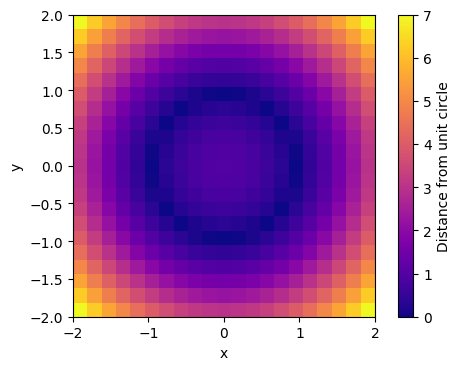

In [28]:
import matplotlib.pyplot as plt
# a nice color map
plt.figure(dpi=100)
plt.rcParams['image.cmap'] = 'plasma'
plt.imshow(pivoted, \
           extent = [min(ex.df.x), max(ex.df.x),
                     min(ex.df.y), max(ex.df.y)], origin='lower')
plt.colorbar(label='Distance from unit circle')
plt.xlabel("x")
plt.ylabel("y")